In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from streamlit_option_menu import option_menu


df = pd.read_csv('final.csv')
df.head(5)

,NO,KELURAHAN,KECAMATAN,KABUPATEN,OBJECT,MERK,JENIS,DP NET,TENOR
0,1,72,CIMAHI UTARA,KOTA CIMAHI,1,18,163,5300000,29
1,2,154,PARONGPONG,KAB. BANDUNG,1,6,243,74000000,12
2,3,185,CIMAHI SELATAN,KOTA CIMAHI,0,3,21,5000000,27
3,4,73,CIDADAP,KOTA BANDUNG,1,3,28,2800000,23
4,5,50,NGAMPRAH,BANDUNG BARAT,0,6,45,4000000,35


In [3]:
df = df.drop(['KECAMATAN','KABUPATEN','NO'], axis=1)
df.head(5)

,KELURAHAN,OBJECT,MERK,JENIS,DP NET,TENOR
0,72,1,18,163,5300000,29
1,154,1,6,243,74000000,12
2,185,0,3,21,5000000,27
3,73,1,3,28,2800000,23
4,50,0,6,45,4000000,35


In [4]:
X = df.iloc[:,0:7].values
X [:5]


array([[      72,        1,       18,      163,  5300000,       29],
       [     154,        1,        6,      243, 74000000,       12],
       [     185,        0,        3,       21,  5000000,       27],
       [      73,        1,        3,       28,  2800000,       23],
       [      50,        0,        6,       45,  4000000,       35]],
      dtype=int64)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

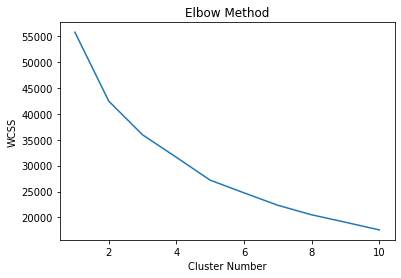

In [6]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()

In [5]:
X = df.iloc[:,1:7].values
from sklearn.metrics import davies_bouldin_score
result = {}
for i in range(2,11):
  kmeans = KMeans (n_clusters=i, random_state=42)
  labels = kmeans.fit_predict(X)
  db_index = davies_bouldin_score(X, labels)
  result.update({i: db_index})
result

c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\clus

{2: 0.5667985309969644,
 3: 0.5633642518973201,
 4: 0.4882705929877529,
 5: 0.4679250732411472,
 6: 0.48254068810926976,
 7: 0.4843153270721715,
 8: 0.4976940267501684,
 9: 0.5015444290814205,
 10: 0.49727229061981415}

In [6]:
kmeans = KMeans(n_clusters=2, random_state=30)
kmeans.fit(X)
pred= kmeans.predict(X)
db_index= davies_bouldin_score(X,pred)
print("Hasil Davies-Bouldin Index " ,db_index)

Hasil Davies-Bouldin Index  0.5667985309969644


c:\Users\dragon\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
df['KELURAHAN'].value_counts()



KELURAHAN
20     280
44     263
180    260
123    245
58     205
      ... 
196      2
48       2
198      1
199      1
55       1
Name: count, Length: 197, dtype: int64